<a href="https://colab.research.google.com/github/RAHULRAJ666DX/Gsm/blob/main/GG_Asm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing all necessary packages**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing all 6 Datasets**

In [ ]:
User_offer_completion_data= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q2_User%20offer%20completion%20data.csv")
User_Offer_df = pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q2_User%20offer%20data.csv")
Rewards_details= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q2_rewards%20details.csv")
User_Signup_data= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q2_users%20signup.csv")
sikka_data_df= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q3_Sikka%20data.csv")
adx_df= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q4_ADX_Sample_data.csv")

### **Data format correction**

In [ ]:
User_Signup_data.info(),User_Offer_df.info(),User_offer_completion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          100 non-null    object
 1   app_id           100 non-null    object
 2   signed_up_on     100 non-null    object
 3   last_login_date  100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    499 non-null    int64 
 1   user_id       499 non-null    object
 2   offer_id      499 non-null    int64 
 3   status        499 non-null    object
 4   started_at    499 non-null    object
 5   completed_at  63 non-null     object
 6   expires_at    436 non-null    object
dtypes: int64(2), object(5)
memory usage: 27.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 e

(None, None, None)

In [ ]:
# Converting all date columns format to datetime 
User_Signup_data['last_login_date'] = pd.to_datetime(User_Signup_data['last_login_date']).dt.date
User_Signup_data['signed_up_on'] = pd.to_datetime(User_Signup_data['signed_up_on'])
User_Offer_df['started_at'] = pd.to_datetime(User_Offer_df['started_at'])
User_offer_completion_data['date'] = pd.to_datetime(User_offer_completion_data['date'])
User_Signup_data['last_login_date'] = pd.to_datetime(User_Signup_data['last_login_date'])
sikka_data['Date'] = pd.to_datetime(sikka_data['Date']).dt.date


In [ ]:
print(list(User_Signup_data.columns))
print(list(User_offer_completion_data.columns))
print(list(Rewards_details.columns))

['user_id', 'app_id', 'signed_up_on', 'last_login_date']
['Unnamed: 0', 'reward_id', 'user_id', 'date', 'app_id']
['Unnamed: 0', 'offer_id', 'reward_id', 'label_in_english', 'total_payout_in_paise', 'total_revenue_in_paise']


In [ ]:
User_Offer_df.isnull().sum()

Unnamed: 0        0
user_id           0
offer_id          0
status            0
started_at        0
completed_at    436
expires_at       63
dtype: int64

In [ ]:
User_Signup_data.isnull().sum()

user_id            0
app_id             0
signed_up_on       0
last_login_date    0
dtype: int64

In [ ]:
User_offer_completion_data.isnull().sum()

Unnamed: 0    0
reward_id     0
user_id       0
date          0
app_id        0
dtype: int64

In [ ]:
Rewards_details.isnull().sum()

Unnamed: 0                 0
offer_id                   0
reward_id                  0
label_in_english          15
total_payout_in_paise      0
total_revenue_in_paise     0
dtype: int64

In [ ]:
User_Offer_df['status'].value_counts()

ONGOING      436
COMPLETED     63
Name: status, dtype: int64

In [ ]:
User_Offer_df.columns

Index(['Unnamed: 0', 'user_id', 'offer_id', 'status', 'started_at',
       'completed_at', 'expires_at'],
      dtype='object')

**User_Offer_df** has **436** ongoing tasks which explains **436 null values** in completed_at column

## Q1

1. User Signup data: User_Signup_data
2. User offer completion data: User_offer_completion_data 
3. Rewards details: Rewards_details

## Starting the solution

### **Data Preprocessing and Joining the data tables**

In [ ]:
# Joining User_Offer_df with User_Signup_data on user_id
Table_UOD_US = User_Offer_df.merge(User_Signup_data, on='user_id', how= 'left')

#replacing all the nan value with null string
Table_UOD_US = Table_UOD_US.replace(np.nan,'',regex=True)


### **Creating Columns**


In [ ]:
Table_UOD_US['started'] = np.where(Table_UOD_US['started_at'] == '' ,0,1)
Table_UOD_US['completed'] = np.where(Table_UOD_US['completed_at'] =='' ,0,1)

### **Left joining 'Rewards_details' with 'User_offer_completion_data' on 'user_id'**


In [ ]:
Raj1 = pd.merge(User_offer_completion_data,Rewards_details,on='reward_id',how='left')
Raj1.head(1)

,Unnamed: 0_x,reward_id,user_id,date,app_id,Unnamed: 0_y,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,2678,3520,Complete Registration,500,1758


## Users who has completed offers

In [ ]:
Raj1.groupby(['app_id'])['user_id'].count().reset_index()

,app_id,user_id
0,sikka,27
1,sikka_pro,43


In [ ]:
Raj1.groupby(['app_id'])['total_payout_in_paise','total_revenue_in_paise'].sum().reset_index()

<ipython-input-294-06b749017cee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Raj1.groupby(['app_id'])['total_payout_in_paise','total_revenue_in_paise'].sum().reset_index()


,app_id,total_payout_in_paise,total_revenue_in_paise
0,sikka,18466,39687
1,sikka_pro,19618,40457


In [ ]:
User_completed_offers = User_offer_completion_data.groupby('app_id')['user_id'].count().reset_index()

In [ ]:
User_completed_offers

,app_id,user_id
0,sikka,27
1,sikka_pro,43


In [ ]:
Full_Table = Rewards_details.merge(User_offer_completion_data[['reward_id','app_id']],on='reward_id',how='left')
Full_Table = Full_Table.replace(np.nan,'',regex=True)

In [ ]:
#dropping unnamed column which is of no use
Full_Table = Full_Table.drop('Unnamed: 0',axis=1)

In [ ]:
Full_Table.columns

Index(['offer_id', 'reward_id', 'label_in_english', 'total_payout_in_paise',
       'total_revenue_in_paise', 'app_id'],
      dtype='object')

### To get the total number of Initiations in both versions of the app we will group wrt to the app_id and we will get the sum of tasks started and Completed so that we will know how many are completed 

In [ ]:
Task_status_table= Table_UOD_US[['app_id','started','completed']].groupby('app_id').sum(['started','completed'])
Task_status_table

,started,completed
app_id,,
sikka,262,23
sikka_pro,237,40


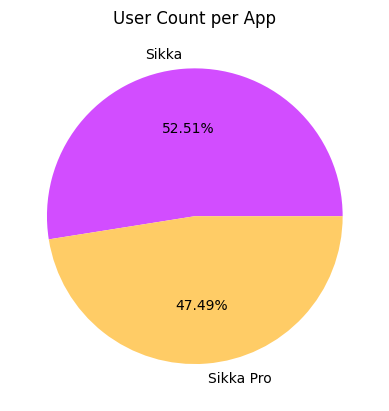

In [ ]:
# plotting a pie chart
# plt.figure(figsize = [4,4])
sns.color_palette(palette="Set2")
plt.pie(Task_status_table['started'],labels = ['Sikka',"Sikka Pro"], autopct='%1.2f%%',colors = ['#d24dff','#ffcc66'])
plt.title('User Count per App')
plt.show()

In [ ]:
Full_Table = Full_Table.loc[Full_Table['app_id'] != '']
Payout_Revenue = Full_Table[['app_id','total_payout_in_paise','total_revenue_in_paise']].groupby('app_id').sum(['total_payout_in_paise','total_revenue_in_paise'])

Payout_Revenue


,total_payout_in_paise,total_revenue_in_paise
app_id,,
sikka,18466,39687
sikka_pro,19618,40457


In [ ]:
Payout_Revenue.columns

Index(['total_payout_in_paise', 'total_revenue_in_paise'], dtype='object')

In [ ]:
Payout_Revenue['Payout_rupees'] = Payout_Revenue['total_payout_in_paise']/100
Payout_Revenue['Total_revenue_rupees'] = Payout_Revenue['total_revenue_in_paise']/100

In [ ]:
Payout_Revenue

,total_payout_in_paise,total_revenue_in_paise,Payout_rupees,Total_revenue_rupees
app_id,,,,
sikka,18466,39687,184.66,396.87
sikka_pro,19618,40457,196.18,404.57


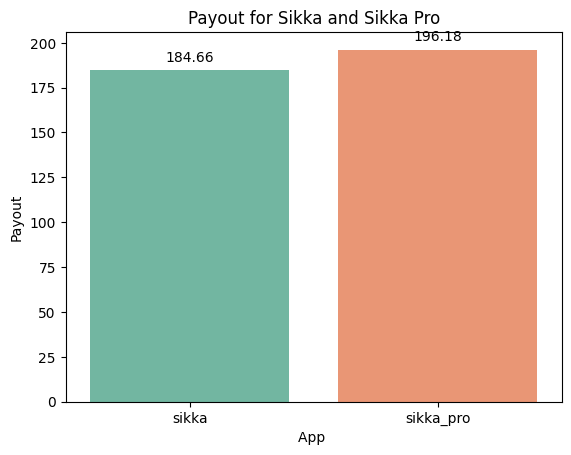

In [ ]:
ax = sns.barplot(x=Payout_Revenue.index, y='Payout_rupees', palette='Set2', data=Payout_Revenue)
plt.title("Payout for Sikka and Sikka Pro", fontsize=12)
plt.xlabel("App ", fontsize=10)
plt.ylabel("Payout", fontsize=10)
# Add the actual numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

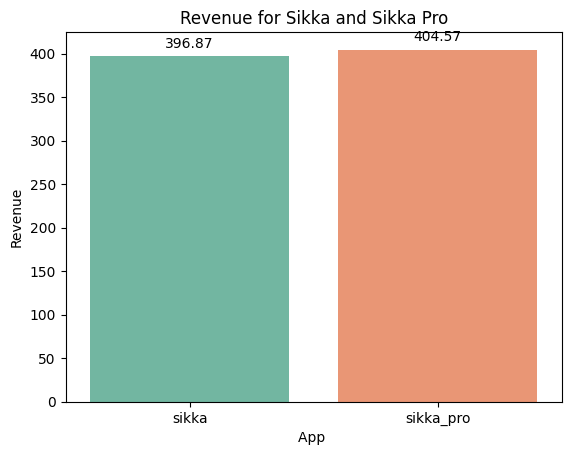

In [ ]:
ax = sns.barplot(x=Payout_Revenue.index, y='Total_revenue_rupees', palette='Set2', data=Payout_Revenue)
plt.title("Revenue for Sikka and Sikka Pro", fontsize=12)
plt.xlabel("App ", fontsize=10)
plt.ylabel("Revenue", fontsize=10)
# Add the actual numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

In [ ]:
Payout_Revenue.columns

Index(['total_payout_in_paise', 'total_revenue_in_paise', 'Payout_rupees',
       'Total_revenue_rupees'],
      dtype='object')

In [ ]:
sns.barplot(x='App', y='Total_revenue_rupees', palette='flare', data=Payout_Revenue)

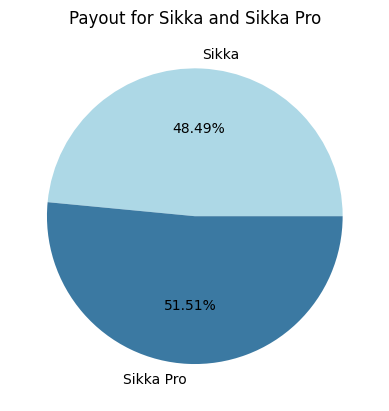

In [ ]:
sns.color_palette(palette="Set2")
plt.pie(Payout_Revenue['Payout_rupees'],labels = ['Sikka',"Sikka Pro"], autopct='%1.2f%%',colors = ['#add8e6','#3b79a2'])
plt.title("Payout for Sikka and Sikka Pro", fontsize=12)
plt.show()

## **So the Total Revenue generated and the total payout is almost equal to one another**


In [ ]:
Rewards_details.columns

Index(['Unnamed: 0', 'offer_id', 'reward_id', 'label_in_english',
       'total_payout_in_paise', 'total_revenue_in_paise'],
      dtype='object')

## Revenue generated for Sikka and Sikka pro

In [ ]:
#Merging User_offer_completion_data and Rewards_details

Reward = pd.merge(User_offer_completion_data,Rewards_details, on = 'reward_id')

In [ ]:
Reward = Reward.drop(['Unnamed: 0_x'],axis =1)

In [ ]:
#Merging User_Signup_data and Reward

Revenue =pd.merge(User_Signup_data,Reward, on = ['user_id','app_id'])

In [ ]:
Revenue.head(1)

,user_id,app_id,signed_up_on,last_login_date,reward_id,date,Unnamed: 0_y,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,935,2022-11-26,441,792,Complete Registration,200,0


In [ ]:
#Group by on app_id to find total revenue earned by each app
revenue_per_app = Revenue.groupby("app_id")['total_revenue_in_paise'].sum().reset_index()

In [ ]:
#Grouping by "app_id","last_login_date" to find total revenue generated by each app per day
revenue_per_app_per_day = Revenue.groupby(["app_id","last_login_date"])['total_revenue_in_paise'].sum().reset_index()

In [ ]:
#paise to rupees
revenue_per_app_per_day['total_revenue'] = revenue_per_app_per_day['total_revenue_in_paise']/100

In [ ]:
revenue_per_app_per_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   app_id                  8 non-null      object 
 1   last_login_date         8 non-null      object 
 2   total_revenue_in_paise  8 non-null      int64  
 3   total_revenue           8 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 384.0+ bytes


In [ ]:
revenue_per_app_per_day['last_login_date'] = pd.to_datetime(revenue_per_app_per_day['last_login_date'])


In [ ]:
revenue_per_app_per_day['Month'] = revenue_per_app_per_day['last_login_date'].dt.month

In [ ]:
revenue_per_app_per_day

In [ ]:
revenue_per_app_per_day.groupby(['Month'])['total_revenue'].sum()

Month
11    801.44
Name: total_revenue, dtype: float64

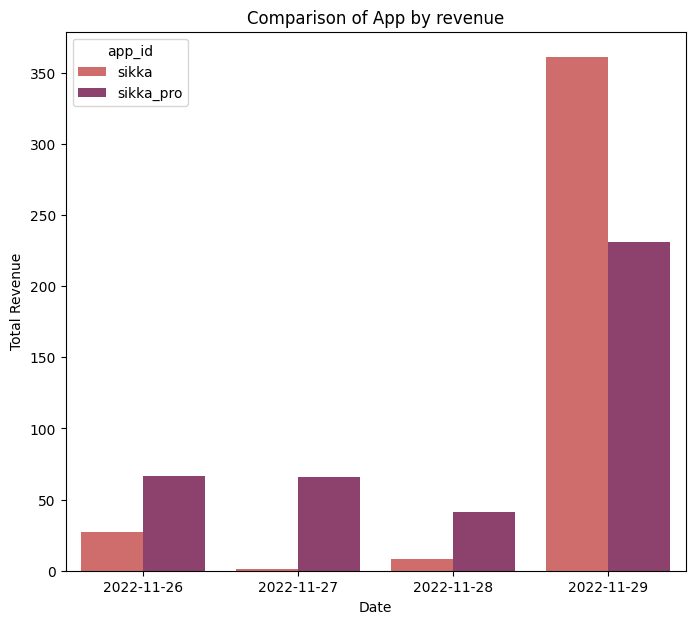

In [ ]:
#Plotting a bar chart
plt.figure(figsize= (8,7))
sns.barplot(y='total_revenue', x='last_login_date', data=revenue_per_app_per_day, hue='app_id', palette ='flare')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Comparison of App by revenue')
plt.show()

In [ ]:
Rewards_details.columns

Index(['Unnamed: 0', 'offer_id', 'reward_id', 'label_in_english',
       'total_payout_in_paise', 'total_revenue_in_paise'],
      dtype='object')

In [ ]:
Rewards_details.total_payout_in_paise.sum()

5593302

In [ ]:
Rewards_details.total_revenue_in_paise.sum()

5256082

In [ ]:
User_offer_completion_data= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q2_User%20offer%20completion%20data.csv")
User_Offer_df = pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q2_User%20offer%20data.csv")
Rewards_details= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q2_rewards%20details.csv")
User_Signup_data= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q2_users%20signup.csv")
sikka_data= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q3_Sikka%20data.csv")
adx_df= pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q4_ADX_Sample_data.csv")

In [ ]:
sikka_data_df.sample(5)

,Date,DAU,Installs,Uninstalls,Signups,Referrals
14,2022-10-15,20829,5659,6519,2967,772.0
0,2022-10-01,24071,6630,6994,3511,962.0
38,2022-11-08,12988,4468,4143,1808,NaN
10,2022-10-11,24497,7308,7532,4347,1161.0
25,2022-10-26,14659,3885,4564,1740,491.0


In [ ]:
Rewards_details.head(1)

,Unnamed: 0,offer_id,reward_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,0,369,451,Download APK,500,0


In [ ]:
User_offer_completion_data.head(1)

,Unnamed: 0,reward_id,user_id,date,app_id
0,0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka


In [ ]:
User_Signup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   user_id          100 non-null    object         
 1   app_id           100 non-null    object         
 2   signed_up_on     100 non-null    datetime64[ns] 
 3   last_login_date  100 non-null    datetime64[ns] 
 4   days             100 non-null    timedelta64[ns]
 5   num_days         100 non-null    int64          
dtypes: datetime64[ns](2), int64(1), object(2), timedelta64[ns](1)
memory usage: 4.8+ KB


In [ ]:
User_Signup_data['num_days'] = User_Signup_data['days'].dt.days.astype(int)

In [ ]:
User_Signup_data.num_days.mean()

1.18

In [ ]:
User_Signup_data['days'] = User_Signup_data['last_login_date'] - User_Signup_data['signed_up_on']

In [ ]:
User_offer_completion_data.shape

(70, 5)

In [ ]:
User_Signup_data.head(1)

,user_id,app_id,signed_up_on,last_login_date
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26


In [ ]:
A=[414,430,461,503,467,502,511,471,532,574,837,598,666,687,562]
BSSG=[485,46,401,449,437,460,435,487,527,528,542,542,557,546,675]

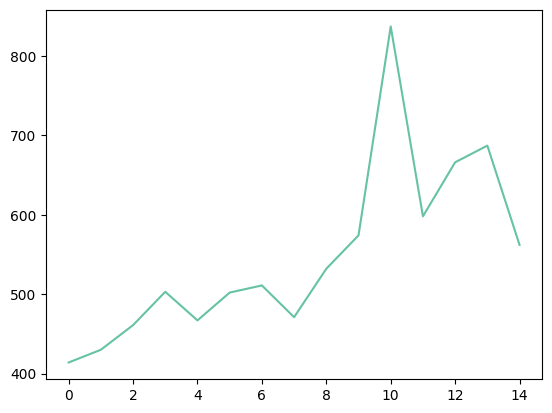

In [ ]:
plt.plot(A)

# 3.Predicting the number of referrals for the first 15 days of November

In [478]:
#Read the dataset
sikka_data = pd.read_csv("https://raw.githubusercontent.com/RAHULRAJ666DX/Gsm/main/Q3_Sikka%20data.csv")

In [479]:
sikka_data.shape

(46, 6)

In [480]:
#Top five rows
sikka_data.head()

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,2022-10-01,24071,6630,6994,3511,962.0
1,2022-10-02,23548,6366,6669,3387,941.0
2,2022-10-03,24572,6936,6899,3654,940.0
3,2022-10-04,24212,6561,6766,3532,960.0
4,2022-10-05,23247,6059,6402,3315,923.0


In [481]:
#converting into datetime type
sikka_data['Date'] = pd.to_datetime(sikka_data['Date']).dt.date

In [482]:
# Create lagged variables for Referrals, Installs, Uninstalls, Signups, and DAU
sikka_data['Referrals_lag1'] = sikka_data['Referrals'].shift(1)
sikka_data['Referrals_lag2'] = sikka_data['Referrals'].shift(2)
sikka_data['Referrals_lag3'] = sikka_data['Referrals'].shift(3)

sikka_data['Installs_lag1'] = sikka_data['Installs'].shift(1)
sikka_data['Installs_lag2'] = sikka_data['Installs'].shift(2)
sikka_data['Installs_lag3'] = sikka_data['Installs'].shift(3)

sikka_data['Uninstalls_lag1'] = sikka_data['Uninstalls'].shift(1)
sikka_data['Uninstalls_lag2'] = sikka_data['Uninstalls'].shift(2)
sikka_data['Uninstalls_lag3'] = sikka_data['Uninstalls'].shift(3)

sikka_data['Signups_lag1'] = sikka_data['Signups'].shift(1)
sikka_data['Signups_lag2'] = sikka_data['Signups'].shift(2)
sikka_data['Signups_lag3'] = sikka_data['Signups'].shift(3)

sikka_data['DAU_lag1'] = sikka_data['DAU'].shift(1)
sikka_data['DAU_lag2'] = sikka_data['DAU'].shift(2)
sikka_data['DAU_lag3'] = sikka_data['DAU'].shift(3)



In [ ]:
#Top five rows
sikka_data.head()

,Date,DAU,Installs,Uninstalls,Signups,Referrals,Referrals_lag1,Referrals_lag2,Referrals_lag3,Installs_lag1,...,Installs_lag3,Uninstalls_lag1,Uninstalls_lag2,Uninstalls_lag3,Signups_lag1,Signups_lag2,Signups_lag3,DAU_lag1,DAU_lag2,DAU_lag3
0,2022-10-01,24071,6630,6994,3511,962.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-02,23548,6366,6669,3387,941.0,962.0,NaN,NaN,6630.0,...,NaN,6994.0,NaN,NaN,3511.0,NaN,NaN,24071.0,NaN,NaN
2,2022-10-03,24572,6936,6899,3654,940.0,941.0,962.0,NaN,6366.0,...,NaN,6669.0,6994.0,NaN,3387.0,3511.0,NaN,23548.0,24071.0,NaN
3,2022-10-04,24212,6561,6766,3532,960.0,940.0,941.0,962.0,6936.0,...,6630.0,6899.0,6669.0,6994.0,3654.0,3387.0,3511.0,24572.0,23548.0,24071.0
4,2022-10-05,23247,6059,6402,3315,923.0,960.0,940.0,941.0,6561.0,...,6366.0,6766.0,6899.0,6669.0,3532.0,3654.0,3387.0,24212.0,24572.0,23548.0


In [ ]:
#Dropping rows with null values
sikka_data.drop(sikka_data.index[:3], inplace=True)

In [477]:
sikka_data.shape

(43, 21)

In [474]:
# separate the input features (lagged data) and the output (referrals)
X = sikka_data[['DAU_lag1', 'DAU_lag2', 'DAU_lag3', 'Installs_lag1', 'Installs_lag2', 'Installs_lag3',
        'Uninstalls_lag1', 'Uninstalls_lag2', 'Uninstalls_lag3', 'Signups_lag1', 'Signups_lag2',
        'Signups_lag3']]
y = sikka_data['Referrals']

In [447]:
#Train-test split
X_train = X.iloc[:-15, 1:-1]
y_train = y.iloc[:-15]
X_test = X.iloc[-15:, 1:-1]
y_test = y.iloc[-15:]

In [484]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Convert the data into an XGBoost-compatible format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Define the parameters for the XGBoost model
param_grid = {
    'objective': ['multi:softmax'],  # Specify the learning task and the corresponding learning objective
    'num_class': [3],  # Number of classes in the dataset
    'tree_method': ['auto'],  # Use the efficient tree building algorithm
    'nthread': [-1],  # Use all available CPU threads
    'learning_rate': [0.1],
    'max_depth': [5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
    'n_estimators': [100]
}

# Define the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [485]:
#Predicting using the X_test
y_pred = model.predict(X_test)

In [486]:
#Predicted values
print("Predicted number of referrals for the first 15 days of November:")
print(y_pred)

Predicted number of referrals for the first 15 days of November:
[426.94995 505.20935 431.41055 428.65396 431.3941  429.69006 429.69006
 429.69006 512.7612  524.88165 501.31607 501.31882 513.4204  513.4203
 500.0565 ]


In [487]:
#Taking first 15 dates of sikka data
df = sikka_data['Date'][-15:] 

In [488]:
#Converting into a DataFrame
df = pd.DataFrame(df)

In [489]:
#Adding Predicted values to existing df dataframe
df['Predicted_Referrals'] = y_pred

In [490]:
#Looking at the dataframe
df.sample(3)

,Date,Predicted_Referrals
41,2022-11-11,501.316071
34,2022-11-04,428.653961
43,2022-11-13,513.420410


<Axes: >

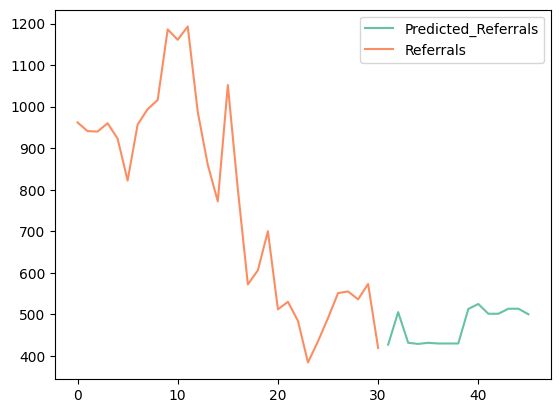

In [491]:
#Comparing the actual referrals to predicted referrals
df['Predicted_Referrals'].plot(legend=True)
sikka_data['Referrals'][:-15].plot(legend=True)

# ADX is an ad exchange platform for large publishers with significant sales. It supports both Web
and mobile apps & game inventories. Through ADX, publishers can sell their ad inventory to
advertisers and agencies using real-time bidding technology. AdX provides more efficient usage of
ad spaces using real-time auctions.

P4. A sample dataset with data for a few apps which uses ADX is given from the month of October.
You need to find out if there is any anomaly present in the data for any of the apps present
in the sample dataset. The metrics you can look into are the requests, impressions, clicks,
revenue, show-rate( impressions/responses ), click-rate (clicks/impressions) or any other feature
which you think will be helpful to gain more insight about any anomaly.

The aim of this analysis will be identify the anomaly present in the dataset.
Procedure that we will be following are:
1. Getting know about the data like about its shape, how does the data look like, what are the column present, identifying the null values if there are any and more.

2. After that we will be adding some column to have better picture of the data.

3. Next we will be plotting graph on the basis of apps to see which app's data is having the outlier.

4. Then, we will be focusing on the app that are having outliers and will generate z score for every feature and get the exact outliers,

In [ ]:
#getting a brief about the data
ADX.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392


In [ ]:
#finding out the shape of the data
ADX.shape

(47935, 10)

In [ ]:
#Checking if there are any null values and presence of any outlier.
ADX.describe()

,pub_id,app_id,ad_unit_code,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
count,47935.000000,4.793500e+04,4.793500e+04,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000
mean,413.188213,5.015577e+07,2.268402e+10,585.827808,516.918202,257.055137,13.502514,2.098320
std,893.645657,2.465772e+07,1.215869e+08,3024.686475,2579.695718,1294.313552,73.922916,27.784254
min,14.000000,1.624327e+07,2.247747e+10,16.000000,16.000000,16.000000,0.000000,0.000111
25%,14.000000,2.559680e+07,2.252151e+10,50.000000,47.000000,27.000000,0.000000,0.026047
50%,51.000000,4.786228e+07,2.275208e+10,109.000000,100.000000,52.000000,2.000000,0.112968
75%,72.000000,4.786228e+07,2.277034e+10,300.000000,275.000000,140.000000,7.000000,0.537878
max,2808.000000,9.567477e+07,2.283576e+10,156435.000000,156296.000000,69448.000000,6853.000000,2137.181915


From the above statistical report we can clearly see that that standard deviation of 'requests',	'ae_responses',	'ae_impressions', 'ae_clicks' and 'ae_revenue' column are very high as comapred to the mean of these columns. This signifies two cases either most of the data present in these columns are very far from the mean or there are some extreme outliers that are responsilble for this. Let's dig deeper into this and see what is the case.

In [ ]:
#adding columns for Show and click rate in the data
ADX['show_rate'] = ADX['ae_impressions']/ADX['ae_responses']
ADX['click_rate'] = ADX['ae_clicks']/ADX['ae_impressions']

In [ ]:
# Creating a new data frame and Grouping by the app id to further plot the whole dataset for infering the highest revenue generation app
df = ADX[['app_id','ae_revenue']].groupby('app_id').sum('ae_revenue').sort_values(by='ae_revenue',ascending=False)

            ae_revenue
app_id                
22693095  51191.627809
40931528  21900.482256
43840611   5373.715967
16243270   4245.317619
25596802   4077.663850
63338696   3269.125146
47862278   3191.668051
95674771   2868.401602
84650721   2387.244188
66981243   2077.719197


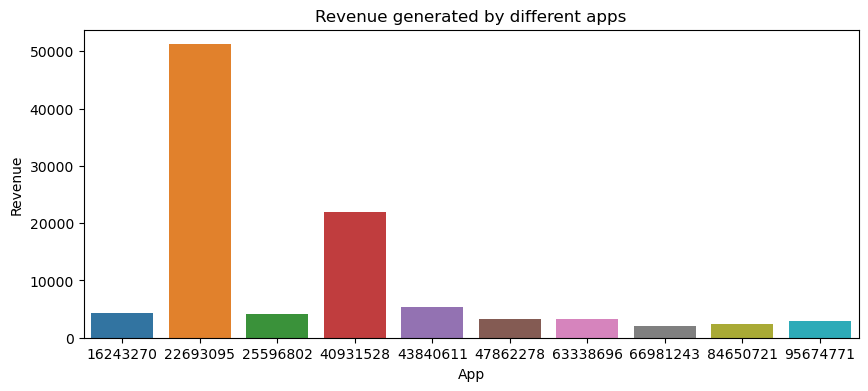

In [ ]:
#Now that we have added columns and grouped the data, let's understand which app is contributing how much to the revenue by plotting it
plt.figure(figsize=(10,4))
sns.barplot(x=df.index, y='ae_revenue', data= df)
plt.title("Revenue generated by different apps", fontsize = 12)
plt.xlabel("App",fontsize = 10)
plt.ylabel("Revenue",fontsize = 10)
print(df)

What we can infer from this graph is that for the app id '22693095' and '40931528' the revenue is abnormally high.
Now we will be creating specific dataframe for these app ids and we will be detecting the anomalies thatare causing this.

In [ ]:
#creating dataframes for the abnormally high revenue generating apps
app_1 = ADX[(ADX.app_id == 22693095)]
app_2 = ADX[(ADX.app_id == 40931528)]

In [ ]:
#droping the unnecessary columns
app_1 = app_1.drop(['date', 'pub_id', 'ad_unit_code'],axis = 1)
app_2 = app_2.drop(['date', 'pub_id', 'ad_unit_code'],axis = 1)

In [ ]:
#grouping by both of the data by country that will help us undertand in which country the revenue got abnormally high 
app_1 = app_1.groupby(['app_id', 'country']).sum('ae_revenue')
app_2 = app_2.groupby(['app_id', 'country']).sum('ae_revenue')

Now, let's just the plot these metrics on the scatter plot and observe the ouliers in the data. 
Plots for the app_1 data:

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_impressions'>

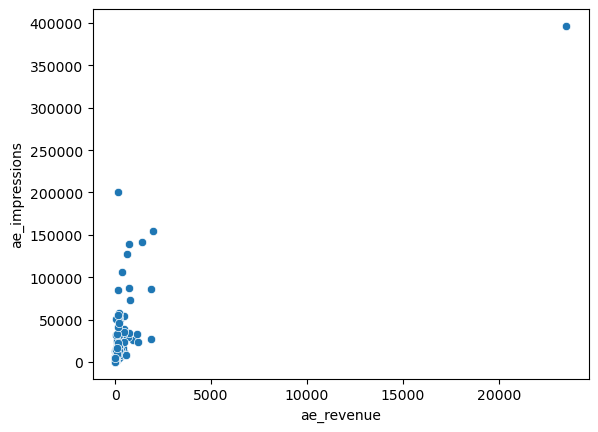

In [ ]:
#Using seaborn to plot for the app_1 data
sns.scatterplot(x='ae_revenue', y='ae_impressions', data=app_1)

<AxesSubplot:xlabel='ae_revenue', ylabel='requests'>

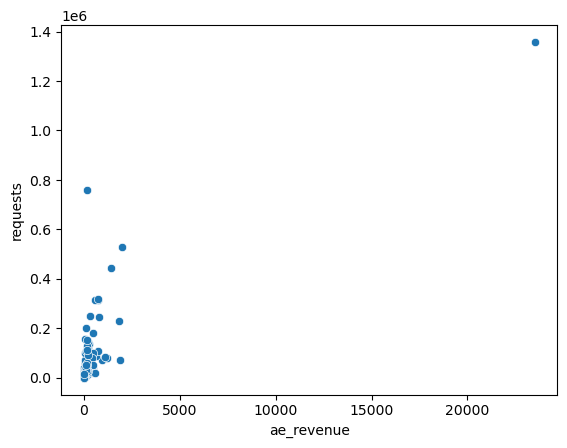

In [ ]:
sns.scatterplot(x='ae_revenue', y='requests', data=app_1)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_responses'>

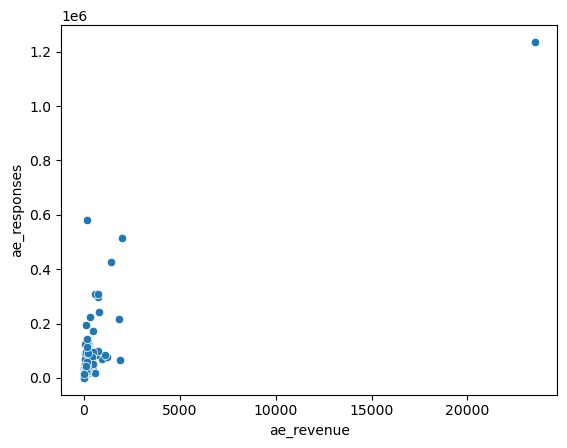

In [ ]:
sns.scatterplot(x='ae_revenue', y='ae_responses', data=app_1)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_clicks'>

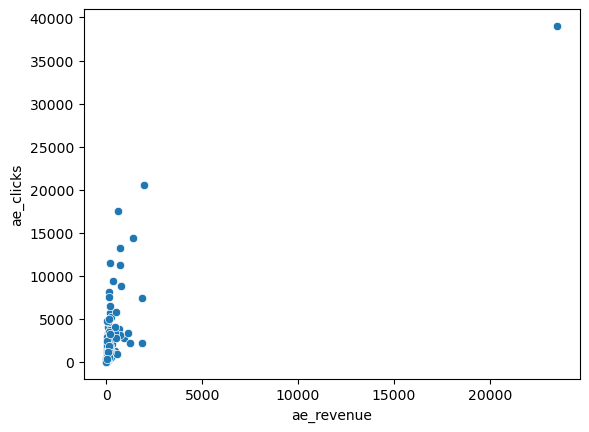

In [ ]:
sns.scatterplot(x='ae_revenue', y='ae_clicks', data=app_1)

Plots for the app_2 data:

<AxesSubplot:xlabel='ae_revenue', ylabel='requests'>

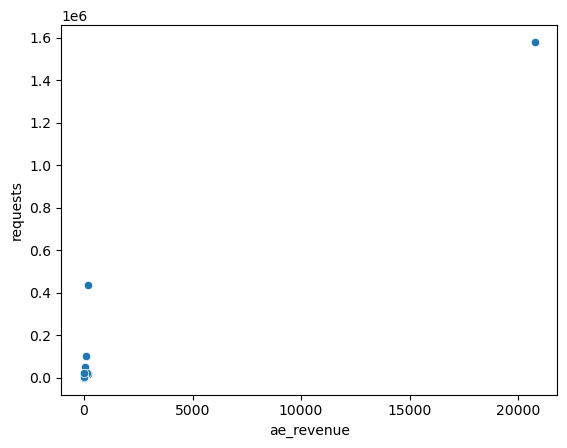

In [ ]:
#Using seaborn to plot for the app_2 data
sns.scatterplot(x='ae_revenue', y='requests', data=app_2)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_responses'>

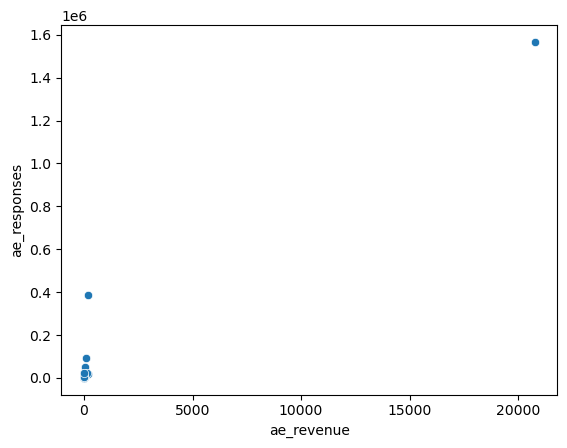

In [ ]:
sns.scatterplot(x='ae_revenue', y='ae_responses', data=app_2)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_impressions'>

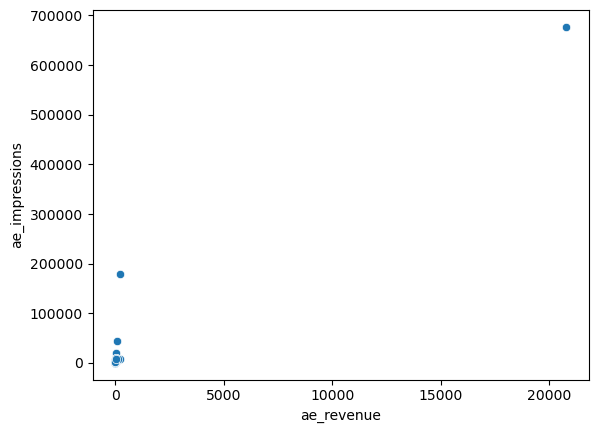

In [ ]:
sns.scatterplot(x='ae_revenue', y='ae_impressions', data=app_2)

<AxesSubplot:xlabel='ae_revenue', ylabel='ae_clicks'>

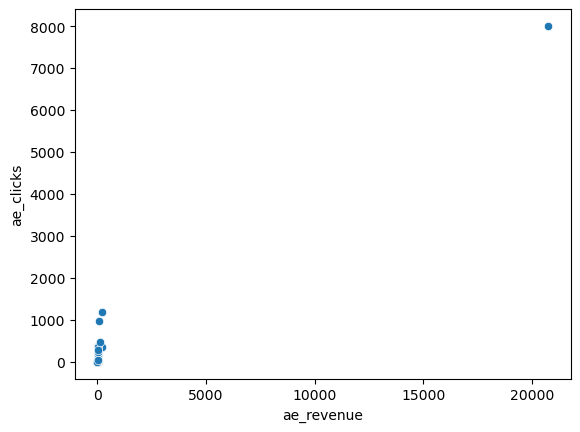

In [ ]:
sns.scatterplot(x='ae_revenue', y='ae_clicks', data=app_2)

After plotting all the graphs we clearly see that in every of the metrics of both app there is an outllier that is far from the distribution.
The revenue is abnoramlly high with respect to the requests, impressions, clicks and responses.

Now, our next step involves finding the exact anomalies in the data.
And for that we are going to calculate the z_score. 
1. Let's first know what is z_score with an example: Lets say there is an array of number till 10, for these 10 numbers z score will be calculated by 
Substracting calculated mean of the data from the items in array then dividing the whole by the standard deviation of the data and then the z score is generated.
Through the Z score we can judge the values if it is away from the mean(Positively or negatively) or not. Generally if the z score is greater than 3 or less then -3. that value is considered as an outlier. 

2. We will be creating a for loop that generates the z_score for all the columns present in the data set of both apps.

3. Then we will creating dataframes for the outliers.

In [ ]:
#for loop to generate the zscore for app1
for col in app_1.columns:
    col_zscore = col + '_zscore'
    app_1[col_zscore] = (app_1[col]-app_1[col].mean())/app_1[col].std(ddof=0)

In [ ]:
app_1

requests  ae_responses  ae_impressions  ae_clicks  \
app_id   country                                                             
22693095 Afghanistan          571           495             196         17   
         Albania            36969         35439           12951       1460   
         Algeria            40754         35030           14247        973   
         Andorra               78            78              40         13   
         Angola             37392         33461           11820       1516   
...                           ...           ...             ...        ...   
         Vietnam            59608         56879           22940       1836   
         Western Sahara       906           893             410         33   
         Yemen                237           235             153         10   
         Zambia             51554         42933           16425       1196   
         Zimbabwe           14017         13101            4861        299   

                         ae_revenue  show_rate  click_rate  requests_zscore  \
app_id   country                                                              
22693095 Afghanistan       0.345175   4.172300    0.856984        -0.396519   
         Albania          52.230963  31.644676    7.785241        -0.113079   
         Algeria          17.112385  43.477553    6.497883        -0.083604   
         Andorra           1.351628   1.040761    0.681818        -0.400359   
         Angola           47.706650  33.276280   10.249056        -0.109785   
...                             ...        ...         ...              ...   
         Vietnam         153.861943  43.499355    7.168897         0.063217   
         Western Sahara    0.736768   7.885361    1.410989        -0.393911   
         Yemen             0.072625   3.882742    0.499272        -0.399120   
         Zambia           92.289406  48.255017    7.614875         0.000498   
         Zimbabwe          8.533728  25.144683    4.103592        -0.291812   

                         ae_responses_zscore  ae_impressions_zscore  \
app_id   country                                                      
22693095 Afghanistan               -0.401922              -0.441164   
         Albania                   -0.100558              -0.116804   
         Algeria                   -0.104085              -0.083847   
         Andorra                   -0.405519              -0.445131   
         Angola                    -0.117617              -0.145565   
...                                      ...                    ...   
         Vietnam                    0.084345               0.137217   
         Western Sahara            -0.398490              -0.435722   
         Yemen                     -0.404165              -0.442257   
         Zambia                    -0.035928              -0.028460   
         Zimbabwe                  -0.293206              -0.322533   

                         ae_clicks_zscore  ae_revenue_zscore  \
app_id   country                                               
22693095 Afghanistan            -0.447700          -0.152346   
         Albania                -0.083284          -0.121403   
         Algeria                -0.206271          -0.142346   
         Andorra                -0.448710          -0.151745   
         Angola                 -0.069142          -0.124101   
...                                   ...                ...   
         Vietnam                 0.011671          -0.060795   
         Western Sahara         -0.443659          -0.152112   
         Yemen                  -0.449468          -0.152508   
         Zambia                 -0.149955          -0.097514   
         Zimbabwe               -0.376484          -0.147462   

                         show_rate_zscore  click_rate_zscore  
app_id   country                                              
22693095 Afghanistan            -1.321816          -1.293707  
         Albania                 0.2

In [ ]:
#for loop to generate the zscore for app2
for col in app_2.columns:
    col_zscore = col + '_zscore'
    app_2[col_zscore] = (app_2[col]-app_2[col].mean())/app_2[col].std(ddof=0)

In [ ]:
#creating dataframes for the outliers for the app1
req_outliers1 = app_1[['requests','requests_zscore']]
req_outliers1 =  req_outliers1[(req_outliers1.requests_zscore>3) | (req_outliers1.requests_zscore<-3)]

click_outliers1 = app_1[['ae_clicks','ae_clicks_zscore']]
click_outliers1 =  click_outliers1[(click_outliers1.ae_clicks_zscore>3) | (click_outliers1.ae_clicks_zscore<-3)]

res_outliers1 = app_1[['ae_responses','ae_responses_zscore']]
res_outliers1 =  res_outliers1[(res_outliers1.ae_responses_zscore>3) | (res_outliers1.ae_responses_zscore<-3)]

imp_outliers1 = app_1[['ae_impressions','ae_impressions_zscore']]
imp_outliers1 =  imp_outliers1[(imp_outliers1.ae_impressions_zscore>3) | (imp_outliers1.ae_impressions_zscore<-3)]

rev_outliers1 = app_1[['ae_revenue','ae_revenue_zscore']]
rev_outliers1 =  rev_outliers1[(rev_outliers1.ae_revenue_zscore>3) | (rev_outliers1.ae_revenue_zscore<-3)]

click_rate1 = app_1[['click_rate','click_rate_zscore']]
click_rate1 =  click_rate1[(click_rate1.click_rate_zscore>3) | (click_rate1.click_rate_zscore<-3)]

show_rate1 = app_1[['show_rate','show_rate_zscore']]
show_rate1 =  show_rate1[(show_rate1.show_rate_zscore>3) | (show_rate1.show_rate_zscore<-3)]

In [ ]:
#creating dataframes for the outliers for the app1
req_outliers2 = app_2[['requests','requests_zscore']]
req_outliers2 =  req_outliers2[(req_outliers2.requests_zscore>3) | (req_outliers2.requests_zscore<-3)]

click_outliers2 = app_2[['ae_clicks','ae_clicks_zscore']]
click_outliers2 =  click_outliers2[(click_outliers2.ae_clicks_zscore>3) | (click_outliers2.ae_clicks_zscore<-3)]

res_outliers2 = app_2[['ae_responses','ae_responses_zscore']]
res_outliers2 =  res_outliers2[(res_outliers1.ae_responses_zscore>3) | (res_outliers2.ae_responses_zscore<-3)]

imp_outliers2 = app_2[['ae_impressions','ae_impressions_zscore']]
imp_outliers2 =  imp_outliers2[(imp_outliers2.ae_impressions_zscore>3) | (imp_outliers2.ae_impressions_zscore<-3)]

rev_outliers2 = app_2[['ae_revenue','ae_revenue_zscore']]
rev_outliers2 =  rev_outliers2[(rev_outliers2.ae_revenue_zscore>3) | (rev_outliers2.ae_revenue_zscore<-3)]

click_rate2 = app_2[['click_rate','click_rate_zscore']]
click_rate2 =  click_rate2[(click_rate2.click_rate_zscore>3) | (click_rate2.click_rate_zscore<-3)]

show_rate2 = app_2[['show_rate','show_rate_zscore']]
show_rate2 =  show_rate2[(show_rate2.show_rate_zscore>3) | (show_rate2.show_rate_zscore<-3)]

C:\Users\amank\AppData\Local\Temp\ipykernel_18492\683349592.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
#Printing all the outliers for the app1
print(req_outliers1)
print(click_outliers1) 
print(res_outliers1) 
print(imp_outliers1)
print(rev_outliers1)
print(show_rate1)
print(click_rate1)

                        requests  requests_zscore
app_id   country                                 
22693095 Brazil           527526         3.707015
         India            757732         5.499688
         Mexico           444929         3.063811
         United States   1357911        10.173437
                        ae_clicks  ae_clicks_zscore
app_id   country                                   
22693095 Brazil             20530          4.732662
         Mexico             14383          3.180296
         Morocco            17497          3.966707
         United States      39018          9.401630
                        ae_responses  ae_responses_zscore
app_id   country                                         
22693095 Brazil               516644             4.049456
         India                579550             4.591970
         Mexico               428159             3.286342
         United States       1236261            10.255585
                        ae_impressions  

In [ ]:
#Printing all the outliers for the app2
print(req_outliers2)
print(click_outliers2) 
print(res_outliers2) 
print(imp_outliers2)
print(rev_outliers2)
print(show_rate2)
print(click_rate2)

                    requests  requests_zscore
app_id   country                             
40931528 Australia   1580002         9.518265
                    ae_clicks  ae_clicks_zscore
app_id   country                               
40931528 Australia       8005           9.67392
Empty DataFrame
Columns: [ae_responses, ae_responses_zscore]
Index: []
                    ae_impressions  ae_impressions_zscore
app_id   country                                         
40931528 Australia          676946                9.55193
                      ae_revenue  ae_revenue_zscore
app_id   country                                   
40931528 Australia  20766.244446           9.898315
Empty DataFrame
Columns: [show_rate, show_rate_zscore]
Index: []
                       click_rate  click_rate_zscore
app_id   country                                    
40931528 Senegal         3.329090            3.04885
         Sierra Leone    3.868298            3.70478


Now what we can infer form the list of outliers for both the apps, let's see:

For the App 1(App id - 22693095)

1. In the country Brazil, India, Mexico and United States considering the revenue, impressions, clicks and requests, there are some abnormally high values especially in United states.

2. For the metric click rate and show rate it looks like there are no outliers.

For the App 2(App id - 40931528)

1. In the country Australia considering the revenue, impressions, clicks and requests, there are some abnormally high values.

2. Considering the metric show rate for country Senegal and Sierra Leone there are a bit high values.